In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/kaggle/input/top-football-leagues-scorers/Data.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


We only looking at this year data

In [3]:
groupby_country_2020 = df.loc[df['Year'] == 2020]

Sum all matched played in 2020 by country

In [4]:
total_match_2020 = groupby_country_2020.groupby('Country')['Matches_Played'].sum()

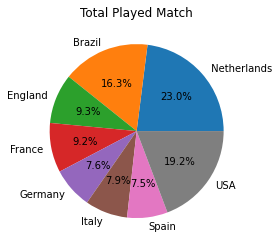

In [5]:
label = list(total_match_2020.index.values)
plt.pie(total_match_2020,labels=label,autopct='%1.1f%%')
plt.title("Total Played Match")
plt.show()

In here i wanna to know if there is correlation between Shots and Goals in all country match

In [6]:
total_goal_2020 = groupby_country_2020.groupby('Country')['Goals'].sum().sort_values()
total_goal_2020


Country
Spain            84
France          103
Italy           105
Germany         107
England         117
Brazil          159
USA             196
 Netherlands    216
Name: Goals, dtype: int64

In [7]:
total_shot_2020 = groupby_country_2020.groupby('Country')['Shots'].sum().sort_values()
total_shot_2020

Country
Spain            365
Germany          390
Italy            436
France           472
England          490
Brazil           823
USA              982
 Netherlands    1146
Name: Shots, dtype: int64

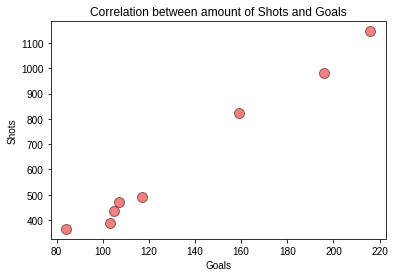

In [8]:
plt.scatter(total_goal_2020,total_shot_2020,s=100,c='red',edgecolor='black',linewidth=1,alpha=0.5)
plt.style.use('seaborn')
plt.xlabel('Goals')
plt.ylabel('Shots')
plt.title('Correlation between amount of Shots and Goals')
plt.show()

We see having more shots having more goals to get.Next i wanna see which player have the most goaled in 2020

In [9]:
most_goaler_player = groupby_country_2020.groupby('Player Names')['Goals'].sum().sort_values(ascending=False)
most_goaler_player = most_goaler_player[:5]
most_goaler_player

Player Names
Thiago Galhardo    15
Cyriel Dessers     15
Steven Berghuis    15
Raul Ruidiaz       14
Myron Boadu        14
Name: Goals, dtype: int64

Text(0.5, 1.0, 'Player Chart')

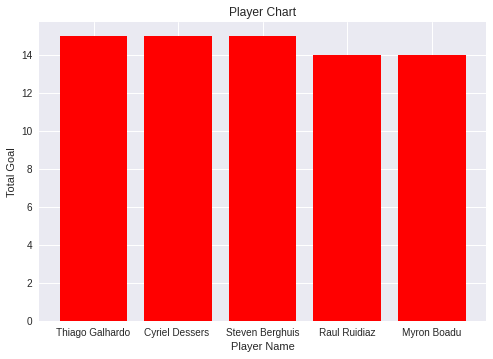

In [10]:
label2 = list(most_goaler_player.index.values)
f, ax = plt.subplots()
ax.bar(label2,most_goaler_player,color='red', alpha=1)
ax.set(xlabel='Player Name',
      ylabel='Total Goal')
plt.title('Player Chart')

I wanna see A few country total goals since 2016 until 2020.Using groupby to take the dataframe and only take Germany,Italy and Spain

In [11]:
goaled_by_country_and_year = df.groupby(['Country','Year'])['Goals'].sum()
total_goal_germany= goaled_by_country_and_year.loc['Germany']
total_goal_italy = goaled_by_country_and_year.loc['Italy']
total_goal_spain = goaled_by_country_and_year.loc['Spain']


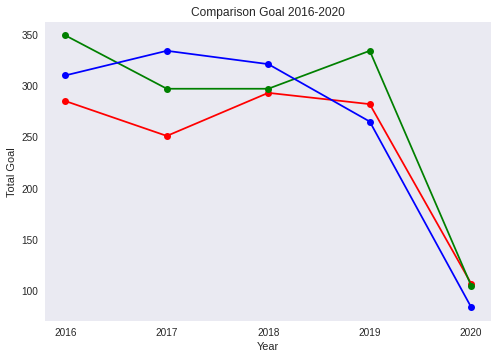

In [12]:
fig, ax = plt.subplots()
plt.plot(total_goal_germany, 'ro-', label='Germany')
plt.plot(total_goal_italy, 'go-', label='Italy')
plt.plot(total_goal_spain, 'bo-', label='Spain')
ax.set(xlabel='Year',
       ylabel='Total Goal',
       title='Comparison Goal 2016-2020')
ax.locator_params(integer=True)
ax.grid()
plt.show()

Is it having more played games and resulting more goals created,we can use scatter to distribute the variabel

In [13]:
total_goal_percountry_and_year = df.groupby(['Country','Year'])['Matches_Played'].sum()
total_match_england = total_goal_percountry_and_year.loc['England']
total_goal_england = goaled_by_country_and_year.loc['England']

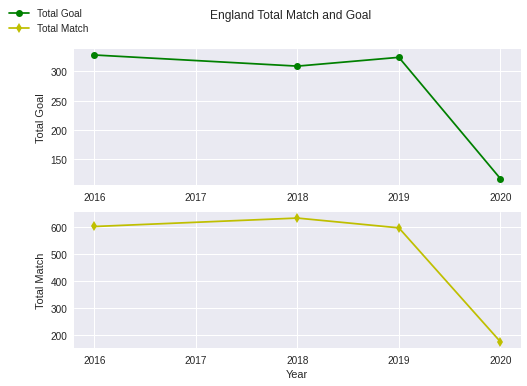

In [14]:
label3 = list(total_match_england.index.values)
fig, (ax1,ax2) = plt.subplots(2,1)

ax1.plot(label3,total_goal_england, 'go-', label='Total Goal')
ax1.set_ylabel('Total Goal')

ax2.plot(label3,total_match_england, 'yd-', label='Total Match')
ax2.set_ylabel('Total Match')

ax2.set_xlabel('Year')
ax1.locator_params(integer=True)
ax2.locator_params(integer=True)
fig.legend(loc='upper left')
fig.suptitle('England Total Match and Goal')
plt.show()


Please upvote if you think this helpful